## PyTorch - Datasets & DataLoaders

#### What are Datasets and DataLoaders?

In real-world ML projects, raw data is often large, unstructured and slow to process. Consequently, we will rarely load all data into memory at once. That's why we need efficient, repeatable and modular data pipelines. PyTorch handles this using:

- `torch.utils.data.Dataset` : Represents the entire dataset and provides access to individual samples.
- `torch.utils.data.DataLoader` : Wraps a dataset and handles batching, shuffling and parallel loading.

PyTorch domain libraries provide a number of pre-loaded datasets:
- **Image Datasets** - https://docs.pytorch.org/vision/stable/datasets.html
- **Text Datasets** - https://docs.pytorch.org/text/stable/datasets.html
- **Audio Datasets** - https://docs.pytorch.org/audio/stable/datasets.html

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

So, a `Dataset` in PyTorch is like a wrapper around our data. That data can be something pre-built, like MNIST from `torchvision.datasets`, or it can be custom, like our own folder of images or a CSV file. When we go custom, we **subclass** `torch.utils.data.Dataset` and we must implement three functions:

- `__init__()` : loads and sets up the data
- `__len__()` : returns the number of samples in our dataset
- `__getitem__()` : returns a sample from the dataset at the given index `idx`

Then, the DataLoader takes that dataset, whether it’s pre-built or custom, and handles things like batching, shuffling and optionally loading data in parallel with multiple workers.

Here is an example of how to load the **Fashion-MNIST** dataset from TorchVision. We load the dataset with the following parameters:

- `root` : is the path where the train/test data is stored
- `train` : specifies training or test dataset
- `download=True` : downloads the data from the internet if it's not available at root
- `transform` and `target_transform` specify the feature and label transformations

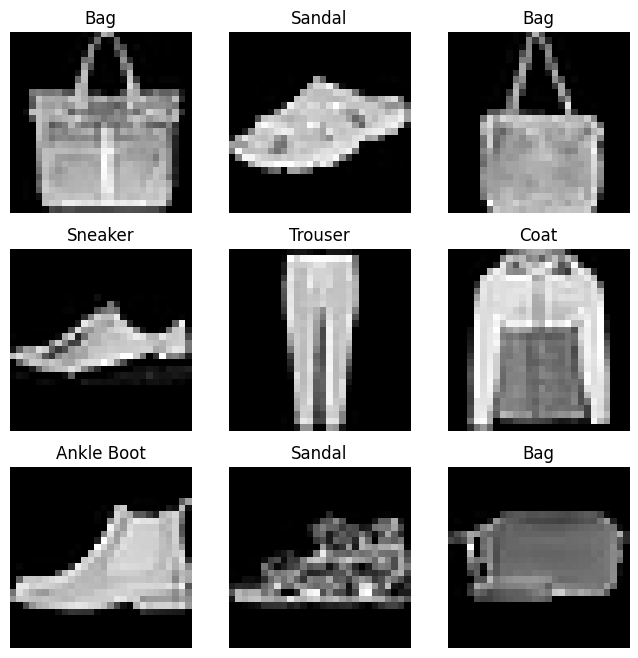

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()